# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.


2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.


3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.


4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [5]:
#Starting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import math
import seaborn as sns
import scipy as sp
#loading data
df = pd.read_csv("./data/dataset_final.csv")
df.head(3)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True


In [6]:
#Functions to use for Task 1.1

def get_number_list(num_str):
    """
    Parses the str to ints, by replacing semi-colon by spaces 
    then splitting into int(numbers) and returning a list.
    Replaces -1 values with the median of all positive values.
    This does not change the median value. (Behaves as if we just ignored all -1s)
    example : 
        input : '123;456;789' (a string)
        output : [123, 456, 789] (a np array of ints)
    """    
    temp = np.array([int(i) for i in num_str.split(';')])
    #Prevents taking the mean of empty arrays (useful for checking csranking later)
    if temp[temp>0].size != 0:
        temp[temp<0] = temp[temp>0].mean()
    return temp

def get_authors_median(df,colname):
    """
    Get the median of the row of numbers after parsing from strings.
    Takes the column name we want to parse from, returns a list that can be used in the df.
    example :
        dataframe['citations_median'] = get_authors_median(dataframe,'citations')
    """
    temp = [get_number_list(x) for x in df[colname].values]
    return [np.median(row) for row in temp]


In [7]:
# 1.1.1 : Median

#Getting the new fields
# medians, with -1 values replaced by the median.
df['authors_citations_median'] = get_authors_median(df,'authors_citations')
df['authors_publications_median'] = get_authors_median(df,'authors_publications')
df['authors_hindex_median'] = get_authors_median(df, 'authors_hindex')

# 1.1.2 : Reputation

#getting values of citations for last author
citations_list = [get_number_list(x) for x in df['authors_citations'].values]
citations_la = np.array([x[-1] for x in citations_list])
#same with publications
publications_list = [get_number_list(x) for x in df['authors_publications'].values]
publications_la = np.array([x[-1] for x in publications_list])

df['reputation'] = np.log10(1 + np.divide(citations_la,publications_la))
df[['authors_citations_median',  'authors_publications_median',  'authors_hindex_median',  'reputation']].sample(3)

,authors_citations_median,authors_publications_median,authors_hindex_median,reputation
3739,2635.0,102.5,17.0,1.452645
2861,34.0,26.0,3.0,1.562176
3476,59.0,10.0,4.0,1.239270


In [8]:
# 1.1.3 - top compagy, top institution

df['has_top_company']=0
df['has_top_institution']=0

#Getting companies
companies = ['Facebook', 'Google', 'Microsoft', 'Deepmind']
#using | or operator
pattern = '|'.join(companies)
has_top_comp = df['institution'].str.contains(pattern, case=False)
df.loc[has_top_comp,'has_top_company']=1

#Getting CS Rankings
csranking_list = [get_number_list(x) for x in df['csranking']]
#Get rid of negative means returned by get_numbers_list
has_top_inst = [any(t<=10 and t>0 for t in b) for b in csranking_list]
df.loc[has_top_inst,'has_top_institution']=1

#Checking that the computed values make sense
df[['institution','csranking','has_top_company','has_top_institution']].sample(3)

,institution,csranking,has_top_company,has_top_institution
114,Stanford University;Stanford University;Stanfo...,4;4;4;-1;-1,1,1
1271,Shanghai Jiao Tong University;Shanghai Jiao To...,52;52;52;52;52;52,0,0
1151,Carnegie Mellon University;Carnegie Mellon Uni...,1;1;26;-1,1,1


***Answer 1.1.4*** 

For invalid values found in *'authors_citations'*, *'authors_publications'* and *'authors_hindex'* columns, we changed the '-1' values by the median of the valid values of the same field. For example, if for a specific paper, the *'authors_citations'* contains the following values: 12;34;-1;114;63, then we changed the '-1' value by the median of (12, 34, 114, 63) list. We choose the median to minimize impact of big values compared with the mean. 

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.


2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


In [9]:
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
# 1.2
# Random split : (rs), with sklearn, using a fixed seed for reproducibility
rs_train, rs_test = train_test_split(df,train_size=0.7, random_state = 667, shuffle = True)
# .copy to suppress all warnings that appear in cells below.
rs_train = rs_train.copy()
rs_test = rs_test.copy()
#checking %
print("Random split:")
print("Percentage of samples in train : {:.2%}, \
in test : {:.2%}".format((len(rs_train)/len(df)), (len(rs_test)/len(df))))
      

# Longitudinal split : (ls)
ls_train = df.query('year == 2018 | year == 2019')
ls_test = df.query('year==2020')
print("\nLongitudinal split:")
print("Number of samples in train {:d}, in test {:d},\nPercentage of samples in train : {:.2%}, \
in test : {:.2%}".format(len(ls_train), len(ls_test), len(ls_train)/len(df), len(ls_test)/len(df)))

Random split:
Percentage of samples in train : 70.00%, in test : 30.00%

Longitudinal split:
Number of samples in train 2204, in test 2052,
Percentage of samples in train : 51.79%, in test : 48.21%


### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- median values the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).


2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?

**From now onwards (in this task and the following ones), consider only the random split.**


3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.


4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.


5. Report the($R^2$ for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)


#### 1.3.1 and 1.3.2

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
lr = LinearRegression()
def get_linreg_r2(x_train,y_train,x_test,y_test, prediction=False):
    """
    Computes the test R^2 score for a given dataset
    Can return the y_predicted (using prediction boolean flag, False by default)
    """
    model = lr.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    if prediction:
        return r2(y_test,y_predicted), y_predicted
    else:
        return r2(y_test,y_predicted)

In [12]:
# 1.3.1
#Getting the features to fit with
features = ['authors_citations_median', 'authors_publications_median',
            'authors_hindex_median', 'reputation']
#Random split
rs_r2score = get_linreg_r2(rs_train[features],rs_train.ratings,
                rs_test[features], rs_test.ratings)
#Longitudinal split
ls_r2score = get_linreg_r2(ls_train[features],ls_train.ratings,
                          ls_test[features], ls_test.ratings)

print("R^2 values for : \n-Random split : {} \n-Longitudinal split: {}".format(rs_r2score,ls_r2score))

R^2 values for : 
-Random split : 0.12070752634552084 
-Longitudinal split: -0.23990602723071341


The longitudinal split is based on publication year as opposed to random split. The training set groups all papers published in 2018 and 2019, and the regression fits on this set. This may fit a trend that is not reflected and generalized when used on the test set, i.e. the papers published in 2020. Thus, the trend observed in 2018 and 2019 may even be reversed with respect to the true trend in 2020. This effect is mitigated in the random split due to the presence of 2020 data in both the training and test set. Nevertheless, the linear fit is poor using this model with the chosen variables. Changing of model, additional variables or a trasnsformation on the variables space may improve the results.  

$R^{2} = 1-\frac{SS_{res}}{SS_{tot}}$ can be negative if the model not only doesn't fit the data and fits worse than the constant y = ȳ. of slope 0, i.e. if $SS_{res}$ is larger than $SS_{tot}$.

#### 1.3.3

In [13]:
def bootstrap_prob_90(data, nbr_draws):
    probs = np.zeros(nbr_draws)
    data = np.array(data)
    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        probs[n] = (len(data_tmp[data_tmp<-2])+len(data_tmp[data_tmp>2]))/(len(data_tmp))

    return [np.nanpercentile(probs, 5),np.nanpercentile(probs, 95)]

Probability of |Residual|>2 = 0.15113547376664058
CI of the probability of |Residual|>2 = [0.13547376664056382, 0.16758026624902117]
Residuals statistics summary:

count    1277.000000
mean        0.019618
std         1.383105
min        -4.027986
25%        -0.908692
50%         0.104470
75%         1.031357
max         3.824387
Name: ratings, dtype: float64


(None, None)

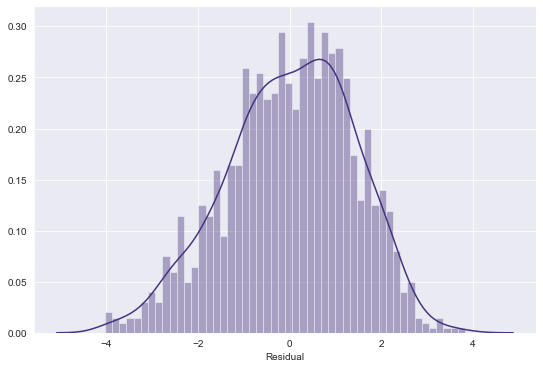

In [14]:
# 1.3.3 
# Using random split only:
_, y_rs_prediction = get_linreg_r2(rs_train[features], rs_train.ratings,
                                rs_test[features], rs_test.ratings,
                                prediction=True)
#Getting the residuals, plotting the distribution
residuals = (rs_test.ratings - y_rs_prediction).reset_index(drop=True)
sns.set_style('darkgrid')
sns.set_palette('viridis')
fig,ax = plt.subplots(figsize=(9,6))
ax = sns.distplot(residuals, bins = 50)
ax.set_xlabel('Residual')
sns.despine()

#standard_res = (residuals-residuals.mean())/residuals.std()
prob = (len(residuals[residuals<-2])+len(residuals[residuals>2]))/len(residuals)
prob_CI = bootstrap_prob_90(residuals,1000)

print("Probability of |Residual|>2 = {}".format(prob))
print("CI of the probability of |Residual|>2 = {}".format(prob_CI))

print("Residuals statistics summary:\n"),print(residuals.describe())


#### 1.3.4 and  1.3.5 

We propose to use has_top_company and has_top_institution as a metric and arxiv, as it breaks the double-blind reviewing process and might lead reviewers to be more biased, e.g. would trust someone from a good company/institution and give him a good rating.

We see in the cell below that these features improved the fit.

In [15]:
# 1.3.5 
#Getting additional features, creating X and y
more_features = ['has_top_company','has_top_institution','arxiv'] 
total_feats = features + more_features
#New model with additional features, prediction and score:
new_r2score = get_linreg_r2(rs_train[total_feats], rs_train.ratings,
                            rs_test[total_feats], rs_test.ratings)

print("Old R^2 values with base features for: \n-Random split : {} \n-Longitudinal split: {}".format(rs_r2score,ls_r2score))
print("\nNew R^2 values for Linear Regression using addtional features : {}".format(new_r2score))

Old R^2 values with base features for: 
-Random split : 0.12070752634552084 
-Longitudinal split: -0.23990602723071341

New R^2 values for Linear Regression using addtional features : 0.13260515016912466


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:

    - Median values the number of author citations, publications and h-indexes as calculated in Task 1.1.1.

    - `reputation` of the last author, as calculated in Task 1.1.2.

Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$.

2. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.


3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

def get_gbr_r2(x_train,y_train,x_test,y_test):
    """
    Gets the test R2 score for GradientBoostingRegressor with default parameters 
    """
    model = gbr.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    return r2(y_test,y_predicted)

In [17]:
features = ['authors_citations_median', 'authors_publications_median',
            'authors_hindex_median', 'reputation']
#1.4.1 
# GBR model
gbr_r2score = get_gbr_r2(rs_train[features], rs_train.ratings,
                         rs_test[features], rs_test.ratings)

#1.4.2
#Getting crazy featuress
rs_train['crazy'] = [9 - ratings if ratings>4.96 else -ratings for ratings in rs_train['ratings']]
rs_test['crazy'] = [9 - ratings if ratings>4.96 else -ratings for ratings in rs_test['ratings']]

#Reshape was necessary to prevent a dimension error.
X_train_crazy = np.array(rs_train['crazy']).reshape(-1,1)
X_test_crazy = np.array(rs_test['crazy']).reshape(-1,1)

#New model with crazy features, linear and GradientBoosting
#Linear
lr_crazy_r2score = get_linreg_r2(X_train_crazy, rs_train.ratings,
                                X_test_crazy, rs_test.ratings)
#GradientBoosting
gbr_crazy_r2score = get_gbr_r2(X_train_crazy, rs_train.ratings,
                                X_test_crazy, rs_test.ratings)
print("R^2 values for Gradient Boosting Regression : \n-Normal: {:.5f}\n-Crazy: {:.5f}".format(gbr_r2score,
                                                                                     gbr_crazy_r2score))
print('R^2 value for Linear Regressor with Crazy features : \n-Crazy: {:.5f}'.format(lr_crazy_r2score))

R^2 values for Gradient Boosting Regression : 
-Normal: 0.10657
-Crazy: 0.99995
R^2 value for Linear Regressor with Crazy features : 
-Crazy: 0.42613


#### Answer to 1.4.3 :

Gradient Boosting Regressor uses decision tree as weak leraners and computes a differentiable loss over the sum of the previous trees and the next one. It means that at each step, the learner aims at correcting the mistakes of the previous ones by selecting the three that will minimize the given loss and have the best correction for a given learning rate. By default, `sklearn.ensemble.GradientBoostingRegressor()` has `learning_rate = 0.1` and `n_estimators = 100`, meaning it will iterate over 100 steps and optimize the fit using a new tree each time. This kind of model allows to significantly reduces the bias of the prediction of the data and if the variance was already low, it is capable of reaching excellent performance. However, it is very case dependent, but we can say that in our setting it works well with the crazy feature.


### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.



2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.

    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
    
    
    
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.



4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

In [14]:
from sklearn.model_selection import cross_val_score
# 1.5.1, using sklearn implementation
def bootstrap_90(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)
    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 5),np.nanpercentile(means, 95)]

def kfold_crossval_tuning(X,y, n_estimators, learning_rates, cv=20):
    """
    Crossvalidation (20fold by default) for hyper params tuning
    the output means and CIs were initially used as a way to check whether
    the values calculated using seaborn's barplot were correct.
    """
    #Getting the 3d tensor to receive results in
    shape = (len(n_estimators), len(learning_rates), cv)
    results = np.empty(shape,dtype=np.float64)
    means = np.empty((len(n_estimators), len(learning_rates)), dtype=np.float64)
    CIs = np.empty((len(n_estimators), len(learning_rates), 2), dtype=np.float64)
    #Iterating
    print("#===Iterating===#")
    for index_n, n_est in enumerate(n_estimators):
        for index_lr, lr in enumerate(learning_rates):
            model = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est)
            results[index_n,index_lr] = cross_val_score(model, X,y, cv = cv, scoring ='r2')
            means[index_n, index_lr] = results[index_n, index_lr].mean()
            CIs[index_n, index_lr] = bootstrap_90(results[index_n, index_lr], 1000)
    print("#===DONE===#")
    
    return results, means, CIs

In [15]:
# 1.5.2
cv_features = ['authors_citations_median',  'authors_publications_median',
               'authors_hindex_median',  'reputation']
n_estimators = [50, 75, 100, 150, 200, 250]
learning_rates = [0.1, 0.05, 0.01]
X = rs_train[cv_features]
y = rs_train.ratings

results, means, CIs = kfold_crossval_tuning(X,y, n_estimators, learning_rates)

#===Iterating===#
#===DONE===#


360


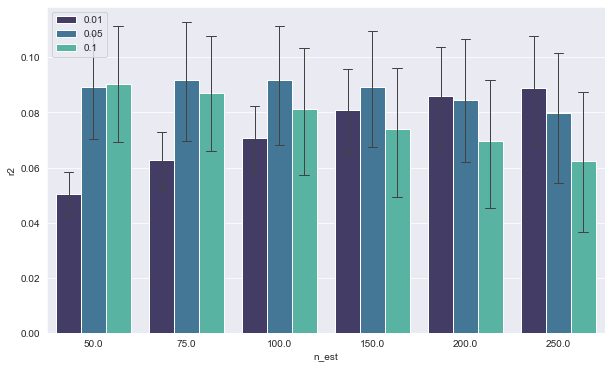

In [16]:
#Reshaping hyperparameters to tiles to fit into the df.
n_est_tile = np.array((np.tile([50],(3,20)), np.tile([75],(3,20)), np.tile([100],(3,20)), np.tile([150],(3,20)), np.tile([200],(3,20)), np.tile([250],(3,20)))).reshape(360)
learning_tile = np.array(6*list(np.array((np.tile([0.1],(1,20)),np.tile([0.05],(1,20)),np.tile([0.01],(1,20)))))).reshape(360)
results_reshaped = results.reshape(360)
data = list(np.array((results_reshaped,n_est_tile,learning_tile)).T)
result_df = pd.DataFrame(data = data, 
                         index=None ,columns = ['r2','n_est','lr'] ,dtype=np.float64)
print(len(result_df))
#plotting
sns.set_palette('mako',n_colors=3)
fig, ax = plt.subplots(figsize=(10,6))
#using sns' bootstrap for a CI at 90%.
ax = sns.barplot(x='n_est', y = 'r2', hue = 'lr', ci=90,n_boot=1000,capsize=0.1, 
                 errwidth=1, data= result_df)
#ax.set_ylim([0.5,1.1])
ax.legend(loc='upper left')

From the value of the 90% confidence interval and the error bar overlaps, we cannot say that the difference between most hyperparameters are significant at the 10% level. Nonetheless, we take the best value to calculate the test $R^{2}$ value for 1.5.3 below

In [17]:
# 1.5.3 
#Getting the best hyper params using argmax
best_indices = np.unravel_index(means.argmax(), means.shape, order='C')
best_n_est = n_estimators[best_indices[0]]
best_lr = learning_rates[best_indices[1]]
best_n_est, best_lr, means[best_indices]
print("Best learning rate {}, best n estimator {:d}".format(best_lr,best_n_est))
#Creating, training model on whole training set:
X = rs_train[cv_features]
y = rs_train.ratings
#Using best hyper-params
best_gbr = GradientBoostingRegressor(learning_rate = best_lr, n_estimators = best_n_est)
best_model = best_gbr.fit(X,y)
best_r2 = r2(rs_test.ratings, best_model.predict(rs_test[cv_features]))
#Comparison with the values from 1.4
print("R squared for the default hyperparameters: {:.4f}".format(gbr_r2score))
print("R squared for the best hyperparameters: {:.4f}".format(best_r2))

Best learning rate 0.05, best n estimator 75
R squared for the default hyperparameters: 0.1065
R squared for the best hyperparameters: 0.1202


#### Answer to 1.5.4:

Hyper-parameters tuning aims to estimate the generalization error of our model on the distribution of the data we were given. Selecting those parameters and estimating the performance on the test set will give overoptimistic (biased) estimates, because it will tend to choose parameters that performs well on the test set (can overfit)  and won't , in general, be the optimal choice for the generalization error which want to estimate the performance on unseen data.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.


2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.


3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

In [32]:
from statsmodels.stats import diagnostic, weightstats
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### 2.1.1
In this part, we use the function displot from seaborn to plot an scaled histogramm with an estimated normal kernel for both accepted and rejected papers. 

The minimal rating for rejected paper is 1.0 and the maximal is 7.333333333333332 
The minimal rating for accepted paper is 2.333333333333333 and the maximal is 8.0 


(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

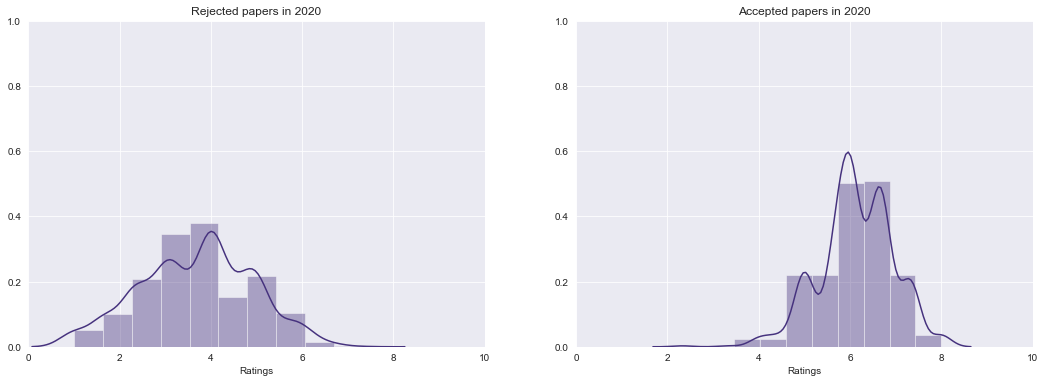

In [20]:
# 2.1.1
accepted = df.query('decisions == "Accept" & year == 2020 ')
rejected = df.query('decisions == "Reject" & year == 2020 ')

# range of values
print("The minimal rating for rejected paper is {min} and the maximal is {max} ".format(min = rejected.ratings.unique().min(),max =rejected.ratings.unique().max() ))
print("The minimal rating for accepted paper is {min} and the maximal is {max} ".format(min = accepted.ratings.unique().min(),max =accepted.ratings.unique().max() ))

# plot distributions
sns.set_style('darkgrid')
sns.despine()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Rejected
sns.distplot(rejected.ratings.values, bins = 10, ax=ax1)
ax1.set_xlabel('Ratings')
ax1.set_title('Rejected papers in 2020')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 1)

# Accepted
sns.distplot(accepted.ratings.values, bins = 10, ax=ax2)
ax2.set_xlabel('Ratings')
ax2.set_title('Accepted papers in 2020')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 1)

#### 2.1.2 and 2.1.3

We first try to evaluate if the rating's distribution of both population follow a normal law. To do that, we perform a Kolmogorov-Smirnov ( non-parametric) test which compare our samples' distribution to a normal one. Choosing a usual $ \alpha = 0.05 $ level of confidence, we reject the null hypothesis, which is the sample is drawn from a normal distribution, if the p-value is smaller than the level chosen.

In [24]:
# perform ks test and recover the statistics and p-value
T_r, p_r = diagnostic.kstest_normal(rejected.ratings.values, dist = 'norm')
T_a, p_a = diagnostic.kstest_normal(accepted.ratings.values, dist = 'norm')
print("The p-value for the rejected population of the KS test is : {:.4f}".format(p_r))
print("The p-value for the accepted population of the KS test is : {:.4f}".format(p_a))

The p-value for the rejected population of the KS test is : 0.0010
The p-value for the accepted population of the KS test is : 0.0010


In both case, we reject the null hypothesis that the ratings distribution is normal. However, the sample size ,in both case, is large enough to consider the central limit theorem. Indeed, there are 1423 rejected and 629 accepted papers. Thus, the central limit theorem (CTL) states that the asymptotic ( when the size tend to infinity) distribution of the mean follows a normal law, whose mean and standard deviation are equal to the mean and standard deviation of the population which can be an arbitrary random variable. In practice, our sample size is large enough to consider the normal law.

We have stated, that we can consider the normal ditribution for the distribution of the mean statistics. In our case, we want to compare the mean rating across all papers between the rejected and accepted ones, thus we are exactly computing the mean statistics from our samples and we can apply the CTL. The only subtleties is that we do not know the variance of the distribution, so we  need to estimate it and we assume that both sample are independent. In this settings, the exact distribution is not normal, but rather  t-distribution with degree of freedom equal to the sample size minus 1.

In [26]:
# perform a levene test and recover the statistics and p-value
t, pvalue = stats.levene(rejected.ratings.values, accepted.ratings.values, center = 'mean') 
print("The p-value for the levene variance test : {}".format(pvalue))

The p-value for the levene variance test : 1.0087921040830634e-34


In the cell above, we have performed a levene statistics which compares if the variance of both sample is equal. We have a very small p-value, so we reject the null hypothesis of equal variance. This indicates, that we have to perform a Welch's t-test for unequal variance correction to analyze if the mean is statistically higher in the accepted group.

In [35]:
# perform a Welch's t-test correction for unequal variance and recover the statistics and the p-value
t,p,d = weightstats.ttest_ind(rejected.ratings.values, accepted.ratings.values, alternative='smaller', usevar='unequal')
# stats.ttest_ind(accepted.ratings.values,rejected.ratings.values, equal_var=False)
print('The p-value for the one tailes t-test that the mean ratings of accepted publications is higher than the rejected : {p_val}'.format(p_val = p/2))

The p-value for the one tailes t-test that the mean ratings of accepted publications is higher than the rejected : 0.0


We have performed a one-tailed welch t-test for unequal variance as our sample mean follow a t-distribution by the CTL. The one-sided hypothesis is used as we want to test if the mean rating is smaller in the rejected papers. The p-value is really small and comes out as zero, thus we reject the null hypothesis and conclude that there is statistical evidence that the mean rating of the rejected paper is not equal to the accepted one. However, this experiment do not allow us to conclude that the mean rating is higher in the accepted population, we might have been lucky or another explanation is better suited. We need to perform further analysis to confirm the result of this test.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.

1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 



2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


In [26]:
# training set -> 2020 papers
X_train = df.query(' year == 2020 ')
# create a binary variable related to decision with 1 being accepted and 0 being rejected to fit the logistic model
X_train['decisions_binary'] = np.where(X_train['decisions'] == 'Accept', 1 ,0)
# create the model using the logit function of statsmodels, intercept already included by default -> no need in patsy formulation
mod = smf.logit(formula='decisions_binary ~ ratings ', data=X_train)
# fit the model
res = mod.fit()
# display the summary
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        10:59:40   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8811      0.597    -21.574      0.000     -14.051     -11.711
ratings        2.3672      0.

<ipython-input-26-f245671a8067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['decisions_binary'] = np.where(X_train['decisions'] == 'Accept', 1 ,0)


#### 2.2.2

The intercept is the value of the log odds when the rating is zero :  $\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1\cdot{0} $ <br>
Exponentiating the intercept gives the odds when the rating is zero : $ \Big( \frac{p}{1-p} \Big) = e^{b_0} $
<br>
This value should be low as our model takes rating from 0 to 8 with zero being very bad, thus the probability p of acceptance should be close to zero. Computing this probability (two cells below) gives indeed a value close to zero as expected.

In [27]:
# function to compute the probability given the coefficient and the rating 
def coefficients_to_probability(coeff,var):
    d = coeff[0]+var*coeff[1]
    return np.exp(d) / (1 + np.exp(d))

In [28]:
# compute the probability for zero rating
p_0 =coefficients_to_probability(res.params.values,0)
print("The probability of acceptance of a paper with a rating of zero is {p}".format(p = p_0))

The probability of acceptance of a paper with a rating of zero is 2.5455811208326736e-06


The coefficient b_1 is gives how much the log odds increase for an increase of 1 of the rating. <br>
It is more intuitive to see it by exponentiating the linear predictor, in that cas it gives by how much the odds is multiplied by the exponential of the predictor for an increase of 1 of the rating  : $ \Big( \frac{p}{1-p} \Big)\cdot{e^{b_1}} = e^{b_0}\cdot{e^{b_1(r +1)}} = e^{b_0}\cdot{e^{b_1\cdot{r}}}\cdot{e^{b_1}} $ <br>
The multiplicative term is equal to $e^{2.3672}= 10.67$ <br>
Therefore, the odds is increased by a factor of 10.67 for an increase of the rating by one, thus the probability of being accepted increases too.

In [29]:
# compute the probability for a rating of seven
p_7 =coefficients_to_probability(res.params.values,7)
print("The probability of acceptance of a paper with a rating of zero is {p}".format(p = p_7))

The probability of acceptance of a paper with a rating of zero is 0.9756242668260545


The probability of being accepted is very high for a rating of seven, as it is almost the highest rating (8) present in our dataset, thus being very likely of being accepted.

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 

2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [36]:
# create the logistic model using patsy formulation and the 2020 training set
mod_2 = smf.logit(formula='decisions_binary ~ ratings + reputation + C(arxiv)', data=X_train)
# fit the data
res_2 = mod_2.fit()
# display the summary
print(res_2.summary())

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        11:27:01   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.2261      0.634    -20.873      0.000     -14.468     -11.984
C(arxiv)[T.

#### 2.3.2
As already done in the previous part, we can express the odds by exponentiating the linear predictor :
$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + ratings\cdot{b_1} + reputation\cdot{b_2} + arxiv\cdot{b_3}} = e^{b_0}\cdot{e^{ratings\cdot{b_1}}}\cdot{e^{reputation\cdot{b_2}}}\cdot{e^{arxiv\cdot{b_3}}}
$$
If all the other coefficients are kept constant, the effect of being in arxiv compared to not on the odds ratio  is given by :
$$
\Big( \frac{p}{1-p} \Big) = e^{b_0}\cdot{e^{ratings\cdot{b_1}}}\cdot{e^{reputation\cdot{b_2}}}\cdot{e^{1\cdot{0.2890}}} = \Big( \frac{p}{1-p}\cdot{1.34} \Big)
$$

Therefore, being in arxiv multiply the odds by a factor of 1.34, thus increasing the probability of being accepted.

This effect is not significant for $\alpha=0.05$ as the p-value for the test statistics of the coefficients is 0.084. On the contrary, it will be for a $\alpha=0.1$, thus we can say that the effect is at the limit of being significant and may not be considered as significant. 

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.


2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [37]:
# create the logistic model using patsy formulation and the 2020 training set 
mod_3 = smf.logit(formula='decisions_binary ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution ', data=X_train)
# fit the model 
res_3 = mod_3.fit()
# display the summary
print(res_3.summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       decisions_binary   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        11:27:17   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -13.3940      0.647    -20

#### 2.4.1
Again the effect on the odds of being in arxiv for a top instituiton is given by :
$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + ratings\cdot{b_1} + reputation\cdot{b_2} + arxiv\cdot{b_3} + top\cdot{b_4} + arxiv:top\cdot{b_5}} = e^{b_0}\cdot{e^{ratings\cdot{b_1}}}\cdot{e^{reputation\cdot{b_2}}}\cdot{e^{arxiv\cdot{b_3}}}\cdot{e^{top\cdot{b_4}}}\cdot{e^{arxiv:top\cdot{b_5}}}  
$$

If all the other coefficients are kept constant, the effect of being in arxiv compared to not on the odds ratio  is given by :
$$
\Big( \frac{p}{1-p}\cdot{1.79} \Big) = e^{b_0}\cdot{e^{ratings\cdot{b_1}}}\cdot{e^{reputation\cdot{b_2}}}\cdot{e^{arxiv\cdot{b_3}}}\cdot{e^{top\cdot{b_4}}}\cdot{e^{1\cdot{0.5793}}}  = ... \cdot{1.79}
$$

#### 2.4.2

Looking at the coefficients arxiv, has_top_institution and the interaction between the two, none of them are significant for $\alpha = 0.05 \space or \space \alpha = 0.1$, they respectively have p-values of 0.597, 0.103 and 0.117. Therefore, there is no statistical evidence that being published on arxiv and belonging to a top institution increases the probability of being accepted according to our logistic model. However, our model do not consider the interaction of the reputation of the last scientist and arxiv, even if the last scientist is not always the most prominent one, or the top company and arxiv. Those effects could also break the double blind reviewing process, but we do not considered them.

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!


2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


***3.1.1*** - So here, we load the dataset containing the propensitiy score into a df that we merge with another df containing 2020 papers. The propensity scores dataset contain the results of a classifier which assigned a probabilty for each paper to be published to arxiv. So, we expand the df containing papers' informations with this new variable. 

In [26]:
# 3.1.1 - Load PS and merge with df containing 2020 papers

# load propensity scores df
propensity_scores = pd.read_csv("./data/propensity_scores.csv.gz")

# display df
propensity_scores.head(3)

,paper,propensity_score
0,Pitfalls of In-Domain Uncertainty Estimation a...,0.360486
1,An Inductive Bias for Distances: Neural Nets t...,0.567842
2,Stochastic AUC Maximization with Deep Neural N...,0.334322


In [27]:
# checking if length of dfs is similar
print('Same length: ', len(propensity_scores) == len(df.query('year==2020')))

Same length:  True


In [28]:
# select only paper from 2020
papers_2020 = df.query('year==2020').copy()

# merge dfs
papers_2020 = pd.merge(papers_2020, propensity_scores, on='paper')

# display result
papers_2020.head(3)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,6.666667,Accept,Samsung;Skolkovo Institute of Science and Tech...,-1;-1;-1;481,0,488;12;481;2097,14;2;17;124,8;1;7;16,False,484.5,15.5,7.5,1.253127,0,0,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,6.750000,Accept,"Department of Computer Science, University of ...",18;18;18;18,1;10,15;23;3;52924,9;13;3;56,2;3;1;22,False,19.0,11.0,2.5,2.975924,0,0,0.567842
2,2020,Stochastic AUC Maximization with Deep Neural N...,Mingrui Liu;Zhuoning Yuan;Yiming Ying;Tianbao ...,6.000000,Accept,University of Iowa;University of Iowa;State Un...,154;154;266;154,9,238;112;2144;3236,29;12;64;187,9;4;24;29,True,1191.0,46.5,16.5,1.262565,0,0,0.334322


***Answer 3.1.2*** 

The classifier we trained in step 1 aimed at predicting the score of a new paper (unseen data) given the reputation of its last author and the median values of their authors' publication, citations and h_index using a linear and a gradient boosting regressor. So there, the classifier is trained with the covariates (features X) and the outcome (label Y) and the model is validated on a test set. In the case of Propensity score matching, we use the covariates only (features X), to estimate a single score representing the probability of being assigned to a treatment. We don't need train/test split for the PS (propensity score) classifier, we train the classifier directly with the entire dataset. Moreover, the goal is not to make predictions about unseen data but rather get a balanced dataset across treatment populations. Also the advantage of PS is that it reduces the problem of matching in multiple dimension to matching a unique variable. So, propensity score matching is a better solution to compare two groups that receive different treatment.

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.


2. Report how many pairs did you manage to match? How many didn't you?

***3.2.1*** - We first check how many published (=treated) and non-published papers (=untreated) there are in the df. From this, we try to link as many treated with untreated papers as possible with a method that iteratively match a paper with another one that has the most similar PS (i.e. minimum difference and smaller than $\epsilon = 0.05$)

**$best = argmin_{c}(|p_{c} - p_t|)$,   {$ c ∈ C | , |p_{c} - p_t|<\epsilon$}** , where **C** is the set of all entries for which the absolute value of its propensity score minus the score of given treated is smaller than $\epsilon$

This method is maybe not the most optimal to match the propensity scores but from [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view), we know that optimal matching doesn't perform better at producing balanced dataset.

In [29]:
print("number of `Treated`", len(papers_2020.query('arxiv==True')))
print("number of `Untreated`", len(papers_2020.query('arxiv==False')))

number of `Treated` 590
number of `Untreated` 1462


In [30]:
# 3.2.1 - matching method

def caliper_matching(df, eps=0.05):
    """
    Note: the returned index pairs are the real index in papers_2020. to use as :
        papers_2020.iloc[]
        or
        treated.loc[] 
        untreated.loc[]
    """
    treated = df.query('arxiv==True').copy()
    untreated = df.query('arxiv==False').copy()
    
    val = 'propensity_score'
    
    pairs = []
    for idx_treated, treated_row in treated.iterrows():
        
        #get the absolute difference
        diff = np.abs(untreated[val]-treated_row[val])
        
        #Only do this if there is a diff < epsilon 
        #(if all the score differences are bigger than eps, won't do anything)
        if len(diff[diff<eps]) != 0:
            
            #query diff < epsilon and get the index of the one that has the minimal difference as the best match
            idx_best = diff.idxmin()
            pairs.append((idx_treated, idx_best))
            
            #delete the rows so there is a 1 to 1 matching.
            treated.drop(index=idx_treated, inplace=True)
            untreated.drop(index=idx_best, inplace=True)

    return pairs

In [31]:
matches = caliper_matching(papers_2020, eps=0.05)

# check matching for first pairs
print('Treated  Untreated')
for m in matches[:10]:
    print('{:.5f}, {:.5f}'.format(papers_2020.iloc[m[0]]['propensity_score'], papers_2020.iloc[m[1]]['propensity_score']))

Treated  Untreated
0.33432, 0.33432
0.36392, 0.36402
0.32403, 0.32402
0.32404, 0.32407
0.36544, 0.36544
0.38552, 0.38543
0.42719, 0.42727
0.31069, 0.31081
0.32477, 0.32476
0.41925, 0.41923


In [32]:
# 3.2.2 - How many matches

print("There were {} numbers of `Treated` for {} numbers of `Untreated`.\
        \nA total of {} matches were found".format(len(papers_2020.query('arxiv==True')),
                                                   len(papers_2020.query('arxiv==False')),
                                                   len(matches)))

There were 590 numbers of `Treated` for 1462 numbers of `Untreated`.        
A total of 590 matches were found


***3.2.2*** - We found a match for each of the 590 entries in `Treated` for $\epsilon = 0.05$. So, we matched the maximum pairs given the 1-to-1 matching rule.

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.


2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).


3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

***3.3.1*** - We decided to visulaize the distribution in two different ways. First, we superimposed the histogram of each treatment for each variable, which allows us to see if there are differences in the distribution and at which level. Secondly, we compared the boxplot of each treatment for each variable to see if there was differences regarding the median value and the overall distribution.

In [33]:
# 3.3.1 - reputation and ratings distribution for treated and untreated

# Get indices
treated_id = [m[0] for m in matches]
untreated_id = [m[1] for m in matches]

# separate treated and untreated samples from matching indices
treated = papers_2020.iloc[treated_id].copy()
untreated = papers_2020.iloc[untreated_id].copy()

In [34]:
treated.reputation.describe()

count    590.000000
mean       1.430553
std        0.527993
min        0.109144
25%        1.098410
50%        1.447166
75%        1.794849
max        2.975924
Name: reputation, dtype: float64

In [35]:
untreated.reputation.describe()

count    590.000000
mean       1.428255
std        0.522482
min        0.066947
25%        1.118062
50%        1.458883
75%        1.772795
max        2.975924
Name: reputation, dtype: float64

In [36]:
treated.ratings.describe()

count    590.000000
mean       4.799068
std        1.487178
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: ratings, dtype: float64

In [37]:
untreated.ratings.describe()

count    590.000000
mean       4.802627
std        1.531212
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: ratings, dtype: float64

From statistical descriptions of each distribution, we see that mean across groups, and quartile are similar. We will look at visualizations to confirm that

C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

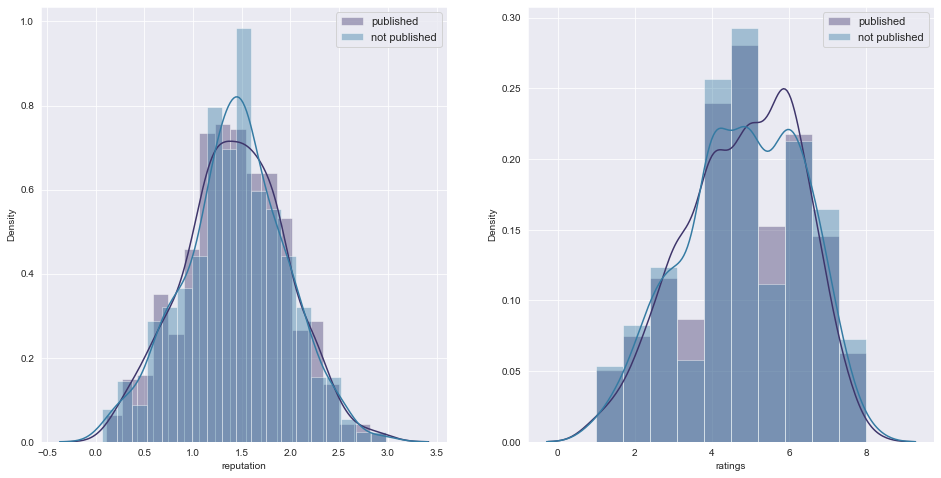

In [38]:
# histogram of distributions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# sns sytle
sns.set_theme(style='darkgrid')

sns.set_palette("mako_r", n_colors=2, desat=None, color_codes=None)

# Reputation histogram
sns.distplot(treated['reputation'], hist=True, label='published', ax=ax1)
sns.distplot(untreated['reputation'], hist=True, label='not published', ax=ax1)
ax1.legend()

# Ratings histogram
sns.distplot(treated['ratings'], hist=True, bins = 10, label='published', ax=ax2)
sns.distplot(untreated['ratings'], hist=True, bins = 10, label='not published', ax=ax2)
ax2.legend()

plt.show()

We see that the distributions of the different treatments look similar for both variables (reputation and ratings)

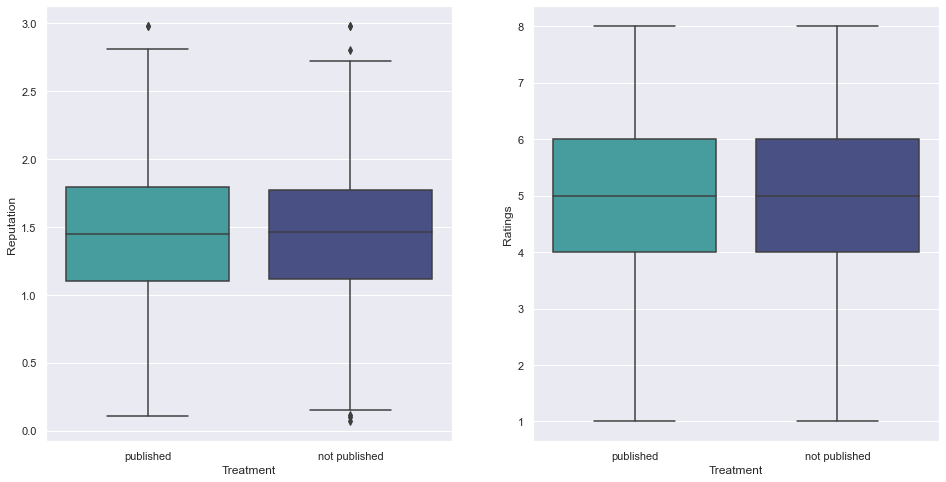

In [39]:
# boxplot of distributions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation boxplot
sns.boxplot(data=pd.DataFrame({'published': treated['reputation'], 'not published': untreated['reputation']}), ax=ax1).set(xlabel='Treatment', ylabel='Reputation')

# Ratings boxplot
sns.boxplot(data=pd.DataFrame({'published': treated['ratings'], 'not published': untreated['ratings']}), ax=ax2).set(xlabel='Treatment', ylabel='Ratings')

plt.show()

Again, the boxplot shows similar mean values and similar distributions overall which is what was expect from the matching. The aim of the propensity score method is to get balanced dataset, we want the distribution of the covariates to be similar between treated and untreated population and the visualization validate that that.

***3.3.2*** - We display the same visualizations as above for the populations publish or not published, which are separated using papers_2020 arxiv column

C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

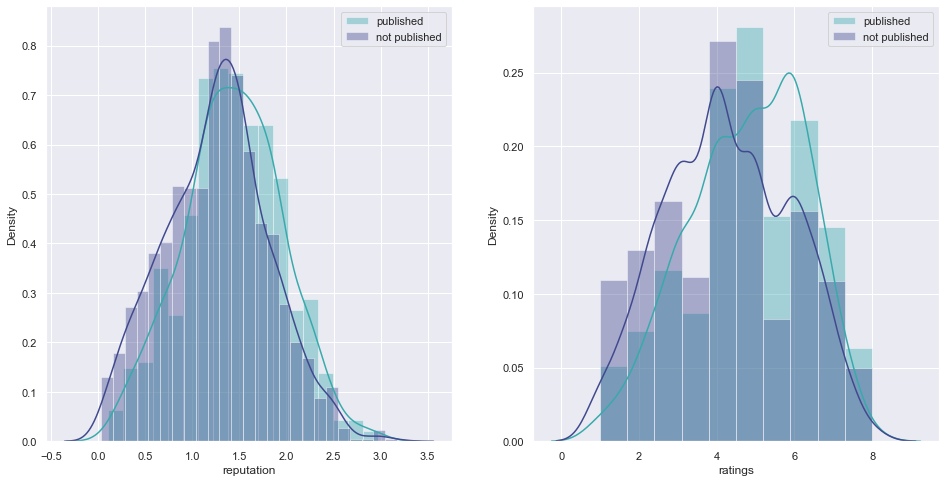

In [40]:
# 3.3.2 - reputation and ratings distribution for arxiv column (including none matched samples this time)
# separate published and not published samples from arxiv column
arxiv_true = papers_2020.query('arxiv == True').copy()
arxiv_false = papers_2020.query('arxiv == False').copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation histogram
sns.distplot(arxiv_true['reputation'], hist=True, label='published', ax=ax1)
sns.distplot(arxiv_false['reputation'], hist=True, label='not published', ax=ax1)
ax1.legend()

# Ratings histogram 
sns.distplot(arxiv_true['ratings'], hist=True, bins = 10, label='published', ax=ax2)
sns.distplot(arxiv_false['ratings'], hist=True, bins = 10, label='not published', ax=ax2)
ax2.legend()

plt.show()

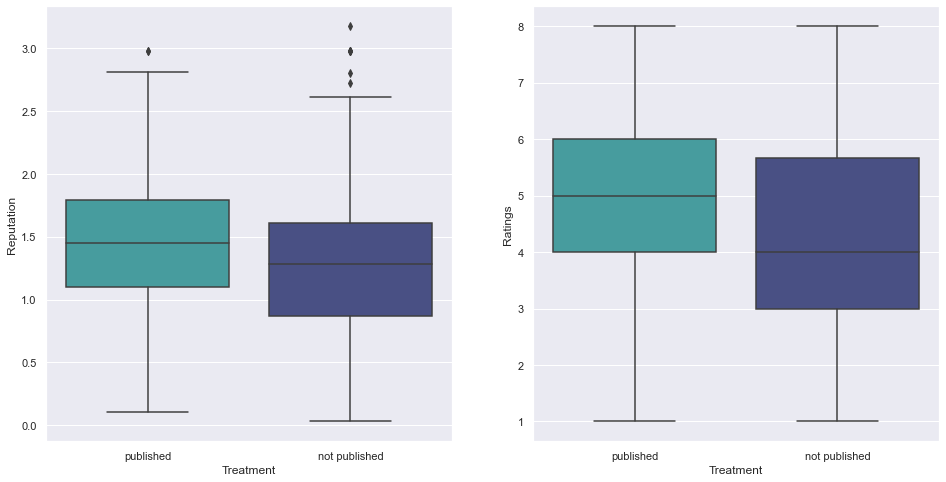

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation boxplot
sns.boxplot(data=pd.DataFrame({'published': arxiv_true['reputation'], 'not published': arxiv_false['reputation']}), ax=ax1).set(xlabel='Treatment', ylabel='Reputation')

# Ratings boxplot
sns.boxplot(data=pd.DataFrame({'published': arxiv_true['ratings'], 'not published': arxiv_false['ratings']}), ax=ax2).set(xlabel='Treatment', ylabel='Ratings')

plt.show()

***Answer 3.3.3*** - Looking at the visualisations, either the histograms or boxplots, we see that the matching did a really good job at balancing the covariates, the histograms are almost superimposed, the boxplot have the same mean and quartiles, they look very similar. Moreover, when looking at the same visualizations for arxiv populations (published or not) distributions which represent the same outcome (being publshed or not), we see that the variables (reputation and ratings) are not balanced (boxplots are not aligned), the distribution doesn't look similar. We can also see that by plotting their statistical summary. So we can say that the matching did a good job at balancing covariates.

In [42]:
arxiv_true.ratings.describe()

count    590.000000
mean       4.799068
std        1.487178
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: ratings, dtype: float64

In [43]:
arxiv_false.ratings.describe()

count    1462.000000
mean        4.289364
std         1.610210
min         1.000000
25%         3.000000
50%         4.000000
75%         5.666667
max         8.000000
Name: ratings, dtype: float64

In [44]:
arxiv_true.reputation.describe()

count    590.000000
mean       1.430553
std        0.527993
min        0.109144
25%        1.098410
50%        1.447166
75%        1.794849
max        2.975924
Name: reputation, dtype: float64

In [45]:
arxiv_false.reputation.describe()

count    1462.000000
mean        1.260306
std         0.553965
min         0.029963
25%         0.869232
50%         1.283008
75%         1.605686
max         3.174548
Name: reputation, dtype: float64

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


***3.3.4*** - Here, we want to assess the treatment effect using the ATE score. To calculate this, we need to transform the decision values for the treated df and untreated df into binary vectors that contain {0=Reject, 1=Accept} values. The function np.unique(data, return_inverse=True) returns all unique values in an array and with the parameters return_inverse=True, it also returns an array with positions of each unique variable. Since we have only 2 categorical variables, it allows us to transform the decision column values directly in a vector that contains {0, 1} values. Then, we calculate the min and the 95% CI through the bootstrapping function

In [46]:
# 3.4 - transform categorical array (=decision column) to array containing (0, 1) values and calculate ATE

y_treat = np.unique(treated.decisions.values, return_inverse=True)[1]
y_non_treat = np.unique(untreated.decisions.values, return_inverse=True)[1]

# inverse 0 and 1 in the array, now: 1 = Accept, 0 = Reject
y_treat = (y_treat-1)*(-1)
y_non_treat = (y_non_treat-1)*(-1)

# calculate ATE
ATE_all = np.mean(y_treat-y_non_treat)

# print result
print(ATE_all)

0.03559322033898305


In [47]:
def bootstrap_95(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)
    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5), np.nanpercentile(means, 97.5)]

In [48]:
# print 95% CI with bootstrapping function
CI_all = bootstrap_95((y_treat-y_non_treat), 1000)
print(CI_all)

[-0.006822033898305082, 0.07966101694915254]


### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.


2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

In [49]:
# 3.5.1 - Repeat 3.2 / 3.4 steps with only top institutions papers

# new df containing only top institutions papers
top_institutions = papers_2020.query('has_top_institution == 1').copy()
top_institutions.reset_index(drop=True, inplace=True)

In [50]:
# compute pairs with top_institutions df
matches2 = caliper_matching(top_institutions, eps=0.05)

# check matching for first pairs
print('Treated  Untreated')
for m in matches2[:10]:
    print('{:.5f}, {:.5f}'.format(top_institutions.iloc[m[0]]['propensity_score'], top_institutions.iloc[m[1]]['propensity_score']))

Treated  Untreated
0.36544, 0.36544
0.31069, 0.31053
0.41925, 0.41911
0.32211, 0.32226
0.44191, 0.44171
0.37643, 0.37711
0.40769, 0.40754
0.44137, 0.44303
0.36382, 0.36402
0.45825, 0.45832


In [51]:
# repeat 3.2.2 - How many matches

print("There were {} numbers of `Treated` for {} numbers of `Untreated`.\
        \nA total of {} matches were found".format(len(top_institutions.query('arxiv==True')),
                                                   len(top_institutions.query('arxiv==False')),
                                                   len(matches2)))

There were 161 numbers of `Treated` for 361 numbers of `Untreated`.        
A total of 161 matches were found


We got the maximum number of matches possible, according to the 1-to-1 matching rule

In [52]:
# repeat 3.3.1 - reputation and ratings distribution for treated and untreated

# Get indices 
treated_id = [m[0] for m in matches2]
untreated_id = [m[1] for m in matches2]

# separate treated and untreated samples from matching indices
treated = top_institutions.iloc[treated_id].copy()
untreated = top_institutions.iloc[untreated_id].copy()

C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

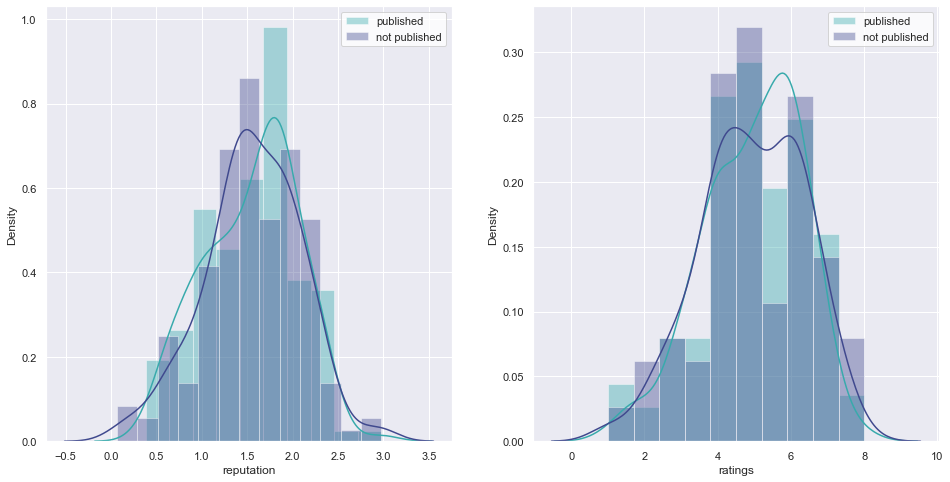

In [53]:
# histogram of distributions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# sns sytle
sns.set_style('whitegrid')
sns.set_palette("mako_r", n_colors=2, desat=None, color_codes=None)

# Reputation histogram
sns.distplot(treated['reputation'], hist=True, label='published', ax=ax1)
sns.distplot(untreated['reputation'], hist=True, label='not published', ax=ax1)
ax1.legend()

# Ratings histogram
sns.distplot(treated['ratings'], hist=True, bins = 10, label='published', ax=ax2)
sns.distplot(untreated['ratings'], hist=True, bins = 10, label='not published', ax=ax2)
ax2.legend()

plt.show()

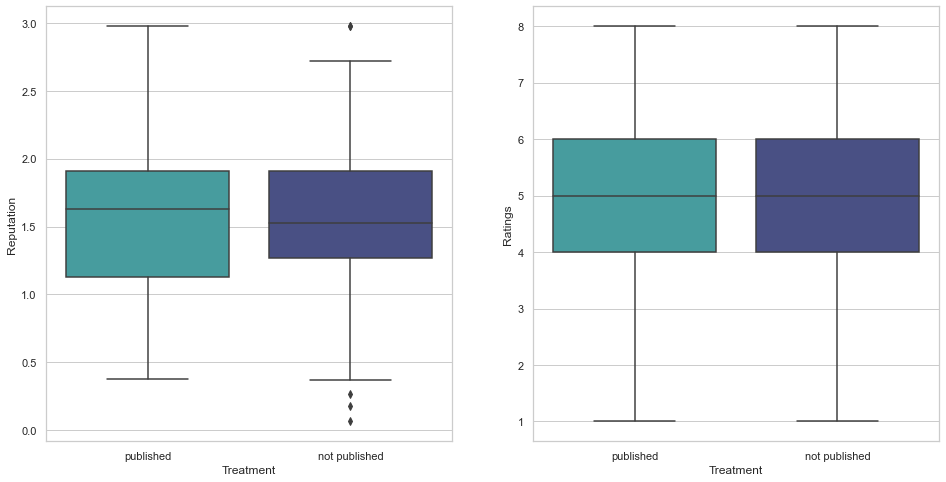

In [54]:
# boxplot of distributions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation boxplot
sns.boxplot(data=pd.DataFrame({'published': treated['reputation'], 'not published': untreated['reputation']}), ax=ax1).set(xlabel='Treatment', ylabel='Reputation')

# Ratings boxplot
sns.boxplot(data=pd.DataFrame({'published': treated['ratings'], 'not published': untreated['ratings']}), ax=ax2).set(xlabel='Treatment', ylabel='Ratings')

plt.show()

C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

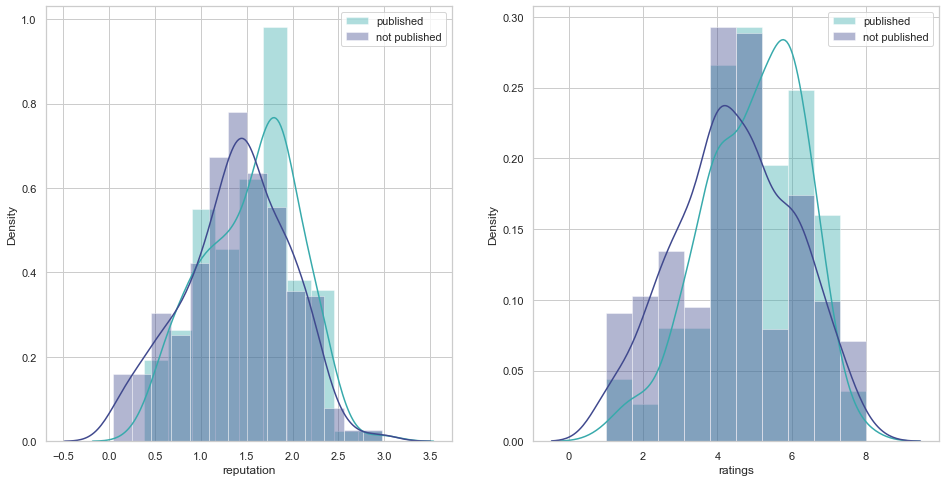

In [55]:
# repeat 3.3.2 - reputation and ratings distribution for arxiv column (including none matched samples this time)

# separate published and not published samples from arxiv column
arxiv_true = top_institutions.query('arxiv == True').copy()
arxiv_false = top_institutions.query('arxiv == False').copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation histogram
sns.distplot(arxiv_true['reputation'], hist=True, label='published', ax=ax1)
sns.distplot(arxiv_false['reputation'], hist=True, label='not published', ax=ax1)
ax1.legend()

# Ratings histogram 
sns.distplot(arxiv_true['ratings'], hist=True, bins = 10, label='published', ax=ax2)
sns.distplot(arxiv_false['ratings'], hist=True, bins = 10, label='not published', ax=ax2)
ax2.legend()

plt.show()

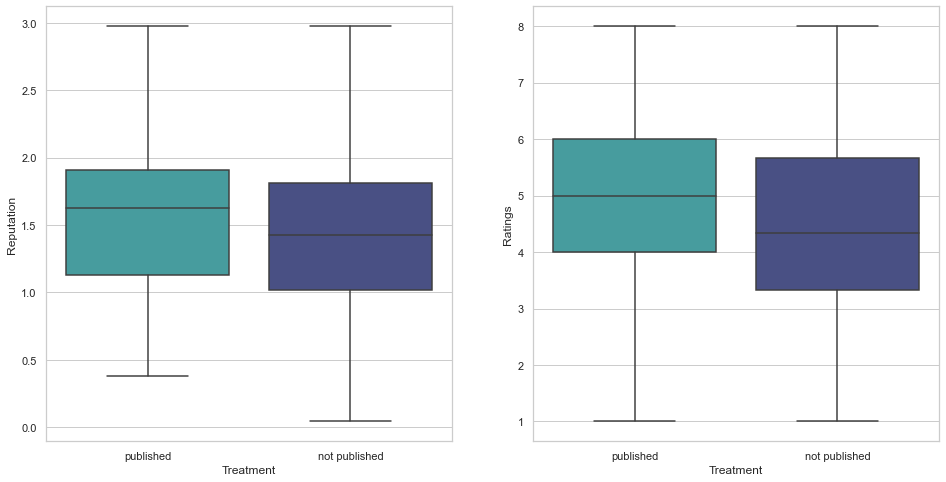

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Reputation boxplot
sns.boxplot(data=pd.DataFrame({'published': arxiv_true['reputation'], 'not published': arxiv_false['reputation']}), ax=ax1).set(xlabel='Treatment', ylabel='Reputation')

# Ratings boxplot
sns.boxplot(data=pd.DataFrame({'published': arxiv_true['ratings'], 'not published': arxiv_false['ratings']}), ax=ax2).set(xlabel='Treatment', ylabel='Ratings')

plt.show()

In [57]:
# repeat 3.4 - transform categorical array (=decision column) to array containing (0, 1) values and calculate ATE

y_treat = np.unique(treated.decisions.values, return_inverse=True)[1]
y_non_treat = np.unique(untreated.decisions.values, return_inverse=True)[1]

# inverse 0 and 1 in the array, now: 1 = Accept, 0 = Reject
y_treat = (y_treat-1)*(-1)
y_non_treat = (y_non_treat-1)*(-1)

# calculate ATE
ATE = np.mean(y_treat-y_non_treat)

# print result
print("ATE for top institutions:",ATE)
print("ATE from task 3.4:", ATE_all)

ATE for top institutions: 0.09937888198757763
ATE from task 3.4: 0.03559322033898305


In [64]:
# print 95% CI with bootstrapping function
print("Bootstrapped 95% CI for top institutions: ",bootstrap_95((y_treat-y_non_treat), 1000))
print("Bootstrapped 95% CI from task 3.4: ", CI_all)

Bootstrapped 95% CI for top institutions:  [0.012422360248447204, 0.19254658385093168]
Bootstrapped 95% CI from task 3.4:  [-0.006822033898305082, 0.07966101694915254]


***Answer 3.5.2***

When comparing to the values we got in task 3.4 for both the ATE and the 95% confidence interval, we notice that while the 95% CI overlap a bit, the actual value of the ATE for top institutions (0.09938) is not within the 95% confidence interval for the ATE value from task 3.4. This difference suggests that there is evidence that Arxiv breaks the double-blind submission process.